In [1]:
from datascience import *
import numpy as np
%matplotlib inline

---

- ### Overlaid Graphs
    - #### 하나의 가로축, 두 개의 세로축 사용

---

- ### Overlaid Scatter Plots

In [4]:
table = Table.read_table("./csv/sons_heights.csv")
table

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


- #### 가로축: 아들 키, 세로축: 아버지 키, 어머니 키
    - ##### Positive 관계

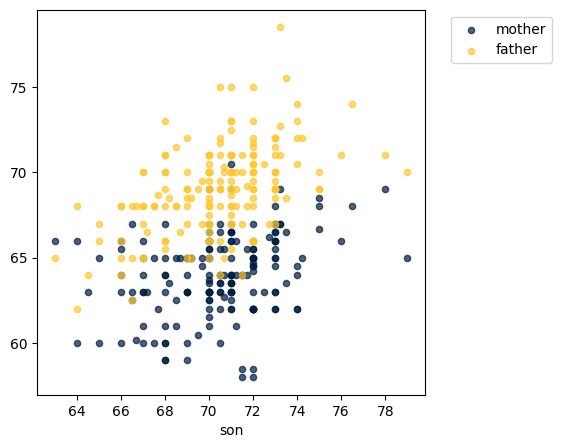

In [6]:
table.scatter("son", make_array("mother", "father"))

---

- ### Overlaid Line Plots

In [8]:
table = Table.read_table("http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv")
table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


- ### 1. 2014, 2019년 0~18세 테이블 추출

In [15]:
new_table = table.select("SEX", "AGE", "POPESTIMATE2014", "POPESTIMATE2019").where("AGE", are.between(0, 19)).where("SEX", are.equal_to(0))
new_table = new_table.drop("SEX")
new_table = new_table.relabeled("POPESTIMATE2014", "2014").relabeled("POPESTIMATE2019", "2019")
new_table.show()

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


- ### 2. 가로축: 나이, 세로축: 2014, 2019년 인구 line plot

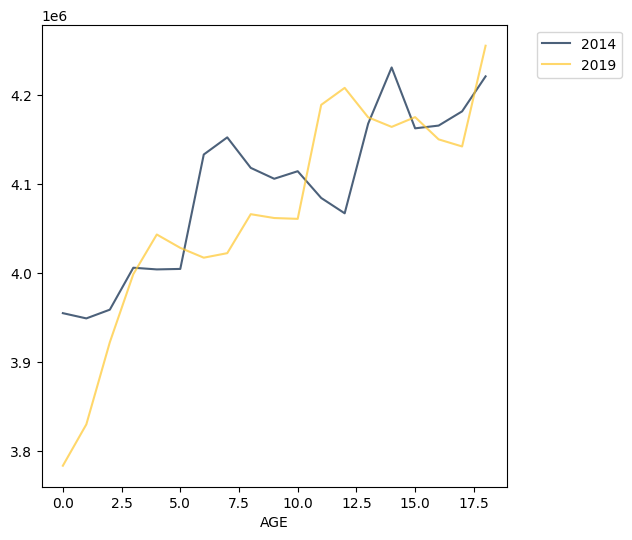

In [17]:
new_table.plot("AGE", make_array("2014", "2019"))

---

- ### Overlaid Bar Chart

In [20]:
table = Table.read_table("./csv/usa_ca_2019.csv")
table

Ethnicity/Race,USA All,CA All,USA Children,CA Children
API,5.8,15.1,4.9,11.5
Black,12.2,5.3,13.4,4.9
Hispanic,18.5,39.5,25.6,52.1
White,60.1,36.4,50,25.5
Other,3.4,3.7,6.1,6


- #### 캘리포니아주의 항후 인구 비율 변동 추이
    - #### 히스패닉 인구 늘어날것으로 보임

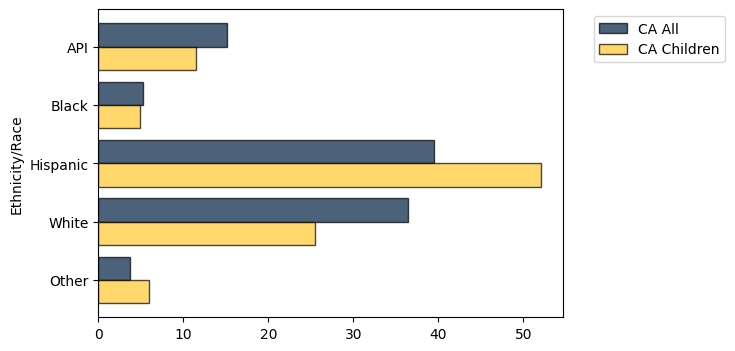

In [21]:
table.barh("Ethnicity/Race", make_array("CA All", "CA Children"))

---

In [24]:
table = Table.read_table("./csv/family_heights.csv")
table

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


- ### 1. 부모 평균 키와 자녀의 키로만 구성된 테이블 생성

In [30]:
new_table = Table().with_columns("midParent", (table.column("father") + table.column("mother")) / 2,
                    "childHeight", table.column("childHeight"))
new_table

midParent,childHeight
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


- ### 2. 산점도

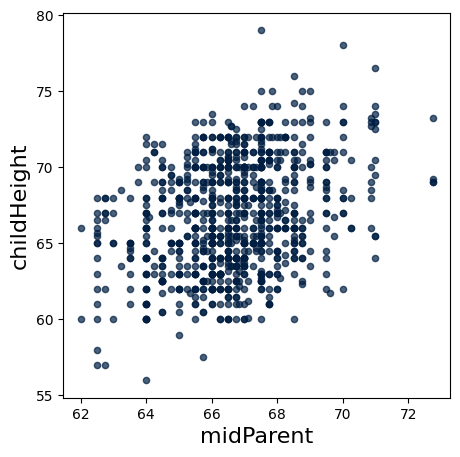

In [31]:
new_table.scatter("midParent", "childHeight")

- ### 3. 부모의 평균키가 68인치인 경우 자녀 키의 평균 계산

In [38]:
new_table.where("midParent", are.between(67.5, 68.5)).column("childHeight").mean()

67.620000000000005

- ### 4. 그래프에 범위와 평균지점 표시

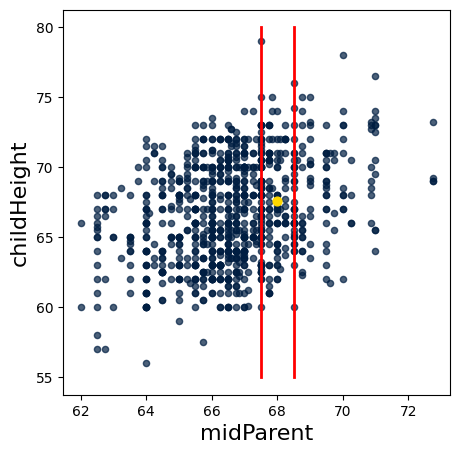

In [46]:
new_table.scatter("midParent", "childHeight")

import matplotlib.pyplot as plt
plt.plot((67.5, 67.5), (55, 80), color='red', lw=2)
plt.plot((68.5, 68.5), (55, 80), color='red', lw=2)

plt.scatter(68, 67.62, color='gold', s=40)